###  Setup

Needed to do some setup for running pandas and numpy

- Did an apt-get install for python3-venv
- Created a virtual environment directory and activated it using the instructions here: https://docs.python.org/3/library/venv.html
- After activation, installed pip and used pip to install pandas and numpy
- Also installed jupyter notebook and ran the notebook under the activated virtual env
- Also installed matplotlib using pip

In [3]:
import pandas
import numpy
# no error

###  Chapter 2  - Intro (Old Edition)

In [13]:
# getting top 10 time zones from a dataset using classic python

from collections import defaultdict
import json
import heapq

tz_dict = defaultdict(int)
with open("/home/rushi/dev/data/pda/ch02/usagov_bitly_data2012-03-16-1331923249.txt", "r") as f:
    for line in f.readlines():
        data = json.loads(line)
        if 'tz' in data.keys():
            tz_dict[data['tz']] += 1

results = heapq.nlargest(10, tz_dict.items(), key=lambda x: x[1])
for result in results:
    print(result)


('America/New_York', 1251)
('', 521)
('America/Chicago', 400)
('America/Los_Angeles', 382)
('America/Denver', 191)
('Europe/London', 74)
('Asia/Tokyo', 37)
('Pacific/Honolulu', 36)
('Europe/Madrid', 35)
('America/Sao_Paulo', 33)


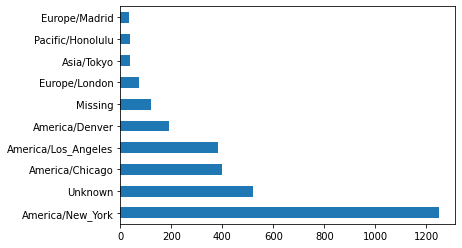

In [12]:
# pandas approach
import json

from pandas import DataFrame, Series
import pandas as pd

records = []
with open("/home/rushi/dev/data/pda/ch02/usagov_bitly_data2012-03-16-1331923249.txt", "r") as f:
    for line in f.readlines():
        records.append(json.loads(line))
        
frame = DataFrame(records)
frame['tz'].value_counts()[:10]

# since the second most tz is unknown, clean up the data a little
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()[:10]
#print(tz_counts[:10])

tz_counts.plot(kind='barh', rot=0)



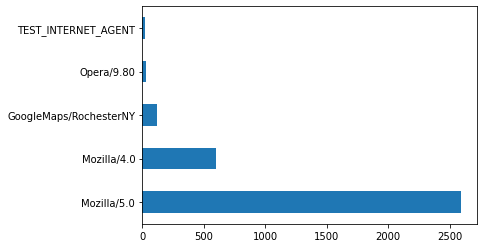

In [11]:

# getting agent strings
results = Series([x.split()[0] for x in frame.a.dropna()])
results.value_counts()[:5].plot(kind='barh', rot=0)

In [20]:
import numpy as np
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'NotWindows')
print(operating_system[:5])

group_by_tz_os = cframe.groupby(['tz', operating_system])

# recreate a table view
agg_counts = group_by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

['Windows' 'NotWindows' 'Windows' 'NotWindows' 'Windows']


,NotWindows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [23]:
# sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]


tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [24]:

# pick the 10 rows with top count
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,NotWindows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


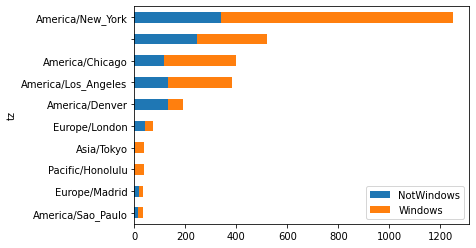

In [26]:
count_subset.plot(kind='barh', stacked=True)

In [67]:
import pandas as pd
import os

data_path = '/home/rushi/dev/data/pda/ch02/'
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(os.path.join(data_path, 'movielens/users.dat'), sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(os.path.join(data_path, 'movielens/ratings.dat'), sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(os.path.join(data_path, 'movielens/movies.dat'), sep='::', header=None, names=mnames, engine='python')

print(users[:5])

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455


In [68]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [70]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [73]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [35]:
#mean_ratings = data.pivot_table('rating', rows='title', cols='gender', aggfunc='mean')
#mean_ratings[:5]

### Chapter 1-2-3 (Edition 2) are introductory for pure python and so are skipped

###  Chapter 4 - Numpy 

In [5]:
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

# IMPORTANT: The %time tag only applies to a single line
# putting it on a preceding line will make it look as though 
# no time is taken for the call

%time for _ in range(10): my_arr2 = my_arr * 3
%time for _ in range(10): my_list2 = my_list * 3

CPU times: user 13.6 ms, sys: 504 µs, total: 14.1 ms
Wall time: 14.1 ms
CPU times: user 231 ms, sys: 10.2 ms, total: 241 ms
Wall time: 241 ms


In [11]:
import numpy as np
data = np.random.randn(2,3) # shape of the output is 2X3
#help(np.random.randn)
print(data)
print(data + data)
print(data * 10)
print(data * data)

# numpy arrays are homogenous
print(data.shape)
print(data.dtype)

[[ 0.44495969 -0.97437562 -0.28132561]
 [ 1.29134199 -0.34296103  0.51717116]]
[[ 0.88991938 -1.94875125 -0.56265122]
 [ 2.58268398 -0.68592205  1.03434232]]
[[ 4.44959691 -9.74375623 -2.8132561 ]
 [12.9134199  -3.42961027  5.17171158]]
[[0.19798913 0.94940785 0.0791441 ]
 [1.66756413 0.11762227 0.26746601]]
(2, 3)
float64


In [28]:

my_list = [1,2,3,4]
np_list = np.array(my_list)
print(np_list)
print(np_list.ndim) # dimensionality - 1
print(np_list.shape) # 4 columns each of them has a scalar (4,)

print("=========")

my_inner_list = [[1,2,3],[4,5,6],[7,8,9]]
np_list = np.array(my_inner_list)
print(np_list)
print(np_list.ndim) # dimensionality - 2 (list of lists)
print(np_list.shape) # 3 columns, each a list of 3 (3,3)

print("=========")

my_inner_list = [[1,2,3],[4,5,6],[7,8,9, 10]]
np_list = np.array(my_inner_list)
print(np_list)
print(np_list.ndim) # dimensionality - 1 since non homogenous sizes
print(np_list.shape) # Non homogenous list size. 3 columns (3,)

print("=========")

my_inner_list = [[[1,1,1],[2,2,2],[3,3,3]],
                 [[4,4,4],[5,5,5],[6,6,6]],
                 [[7,7,7],[8,8,8],[9,9,9]]]
np_list = np.array(my_inner_list)
print(np_list)
print(np_list.ndim) # dimensionality - 3. List of list of list
print(np_list.shape) # 3 columns, each a list with 3 columns, each with 3 column (3,3,3)



[1 2 3 4]
1
(4,)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
2
(3, 3)
[list([1, 2, 3]) list([4, 5, 6]) list([7, 8, 9, 10])]
1
(3,)
[[[1 1 1]
  [2 2 2]
  [3 3 3]]

 [[4 4 4]
  [5 5 5]
  [6 6 6]]

 [[7 7 7]
  [8 8 8]
  [9 9 9]]]
3
(3, 3, 3)


In [34]:
print(np.zeros(10))
print(np.zeros((3,3,3))) # 3 dimensional array
print(np.zeros((2,2,2,2))) # 3 dimensional array

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]]


Visualzing dimensions - initial attempt

- 0 dimension. A single value with no metadata. Ex: 19
- 1 dimension. List of values. 1 metadata variable: size. Ex: [1,2,3,4]. Size: 4
- 2 dimension. Matrix of values. Can grow horizontally or vertically. Imagine a sheet of paper which can grow horizontally or verically. Metadata: x-size and y-size Eg: Matrix with m,n row, column values to indicate size
- 3 dimension. Multiple sheets of paper layered on one other. Extra metadata value to represent number of sheets. 3 sheets of paper. each paper length 1m and height 2m can be represented as 1,2,3
- 4 dimension. Multiple stacks of sheets of paper. Extra metadata value represents the number of such stacks. Ex: 4 stacks of paper. Each stack with 5 sheets of paper and each paper has height 2m and widhth 3 me : (3,2,5,4) : (height, width, numsheets, numstacks)
- 5 dims : multiple boxes. each box contains multiple stacks of paper. extra variable indicates the number of such boxes
- 6 dims: container with boxes representing 5 dims.
- 7 dims: boats with container
- 8 dims: fleet with boats


In [56]:
# array creation methods

print(np.zeros(4))
print(np.zeros((2,2)))
print(np.ones((2,2)))
print(np.empty(3)) # unintialized
print(np.arange(4))

my_list = [[1,2],[3,4]]
my_np = np.array(my_list) # copies data into np.array
print(my_np)

my_np_2 = np.asarray(my_list) # does a copy
my_np_2 = np.asarray(my_np) # does not do a copy

my_ones = np.ones_like(my_np_2) # create ones with same shape
print(my_np_2.shape)
print(my_ones.shape)

# use shape fill with value
my_fullof9s = np.full_like(my_ones , 9)
print(my_fullof9s)

# similarly
print(np.zeros_like(my_ones))
print(np.empty_like(my_ones))

# identity (0s on the diagonal)
# always creates an N*N matrix
print(np.eye(3))
print(np.identity(3))

[0. 0. 0. 0.]
[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[1. 1. 1.]
[0 1 2 3]
[[1 2]
 [3 4]]
(2, 2)
(2, 2)
[[9 9]
 [9 9]]
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [60]:
# data types
int_arr = np.array([1,2,3,4])
print(int_arr.dtype)

# cast to a different type (always copies)
float_arr = int_arr.astype(np.float64)
print(float_arr.dtype)

# downcasting works - be careful
floats = [1.2,3.4]
print(np.array(floats).astype(np.int32)) # will give truncated values

int64
float64
[1 3]


In [67]:
arr = np.array([[1,2,3], [4,5,6]])

print(arr + arr)
print(arr == arr) # returns booleans with same shape
print(arr * arr)

print(arr * 3) # scalars apply to all elements
print(arr ** 2) # scalars apply to all elements
print(1/arr) # scalars apply to all elements

# operations between differently sizes arrays 
# termed 'broadcasting' seems to be an advanced topic

diff_arr = np.array([[1,2,3], [4,5,6], [7,8,9]])

print(arr + diff_arr[0:2]) # this works !

[[ 2  4  6]
 [ 8 10 12]]
[[ True  True  True]
 [ True  True  True]]
[[ 1  4  9]
 [16 25 36]]
[[ 3  6  9]
 [12 15 18]]
[[ 1  4  9]
 [16 25 36]]
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[ 2  4  6]
 [ 8 10 12]]


In [72]:
# indexing and slicing
arr = np.arange(10)
print(arr)
print(arr[-2:])
print(arr[3:5])

# all slices are views and no copies are made implicitly
# which means that changes are reflected in original array

arr[3:5] = [-1, -1]
print(arr)

# scalars are broadcasted (applied to all values in the slice)
arr[7:] = 12
print(arr)

# slices are views
arr_slice = arr[0:1]
arr_slice[:] = 23
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[8 9]
[3 4]
[ 0  1  2 -1 -1  5  6  7  8  9]
[ 0  1  2 -1 -1  5  6 12 12 12]
[23  1  2 -1 -1  5  6 12 12 12]


In [97]:
# working with higher dim arrays

# create a 3 dimensional array (list of 2 dim arrays)
arr = np.array([np.full((2,2), x) for x in range(3)])
print(arr)

print("=====")

# indexing the 3 dim array results in the 2 dim elemen t
print(arr[1])

# chained indexing
print(arr[2][1]) # results in a 1 dim array
print(arr[2][1][0]) # results in a 0 dim array, scalar
print(type(arr[2][1][0]))
print(arr[2][1][0].dtype)

print("====")
# comma separated indexing is the same thing
print(arr[2,1,0])

# slicing
print(arr[:,1,0]) # from each 2 dim array, pick row 1 and from there element 0
arr[:,1,0] = 35
print(arr)

print("=====")

# mixing indexes and slices results in a lowe dimensional slice
dim_3 = np.ones((3,2,2))
print(dim_3.ndim)
# gets the last 2 dim element's last 1 dim elements' last element
# this is a single element
dim_3_slice = dim_3[-1:,-1:,-1:] 
# though a single element, it's still a 3 dim view since 
# we did not use indexes, only slices
print(dim_3_slice.ndim)
print(dim_3_slice)

# using indexeds + slices results in a lower dim
dim_2_slice = dim_3[-1,-1:,-1:]
print(dim_2_slice.ndim)
print(dim_2_slice)

# using 2 indexes
dim_1_slice = dim_3[-1,-1,-1:]
print(dim_1_slice.ndim)
print(dim_1_slice)

# using 3 indexes
dim_0_slice = dim_3[-1,-1,-1]
print(dim_0_slice.ndim)
print(dim_0_slice)


[[[0 0]
  [0 0]]

 [[1 1]
  [1 1]]

 [[2 2]
  [2 2]]]
=====
[[1 1]
 [1 1]]
[2 2]
2
<class 'numpy.int64'>
int64
====
2
[0 1 2]
[[[ 0  0]
  [35  0]]

 [[ 1  1]
  [35  1]]

 [[ 2  2]
  [35  2]]]
=====
3
3
[[[1.]]]
2
[[1.]]
1
[1.]
0
1.0


In [120]:
# boolean indexing
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(names.dtype)
#'<U4'  means little endian unicode 4 bytes
#help(names.dtype)

print(names)
print(names == 'Bob') # comparison operator on a scalar also broadcasts

# this boolean array can be passed to a different array
# selects rows where the index in the boolean expression array is true
# effectively selects 2 rows (0 and 3)
print(data)
print("===")
print(data[names == 'Bob']) 

# can also slice
print(data[names == 'Bob', -1:]) 
print(data[names == 'Bob', -1:].shape) 

cond = names == 'Bob'
print(data[~cond, -1:]) # negation

#can create masks
cond = (names == 'Bob') | (names == 'Will')
print(type(cond)) # also an ndarray just has booleans
print(cond.dtype)

<U4
['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[ True False False  True False False False]
[[ 0.0203783   1.11994277 -0.51407979  1.13245742]
 [-0.36596106 -1.05154301  0.43952533  0.7653775 ]
 [-0.94395208 -1.87999608 -0.51348828  0.52559861]
 [-0.93631458 -0.25028632 -0.6900305   1.35750237]
 [ 0.62767707  0.62827412 -0.29056594 -0.73218849]
 [ 1.05119636  0.7294467   0.75083831  1.68344635]
 [ 0.0668203  -0.30589904  0.42204542  1.4447867 ]]
===
[[ 0.0203783   1.11994277 -0.51407979  1.13245742]
 [-0.93631458 -0.25028632 -0.6900305   1.35750237]]
[[1.13245742]
 [1.35750237]]
(2, 1)
[[ 0.7653775 ]
 [ 0.52559861]
 [-0.73218849]
 [ 1.68344635]
 [ 1.4447867 ]]
<class 'numpy.ndarray'>
bool


In [121]:
# notation of shape
# higher dimensions come first in the order 
# list of 2 elements each element is a list of 3 scalars
arr = np.array([[2,3,4], [2,3,4]])
print(arr.ndim)
print(arr.shape)

2
(2, 3)


In [146]:
# the next mapping is fascinating
# data < 0 is a 3 dim boolean index. This allows 
# for manipulation at a scalar level
data[data < 0] = 0
print(data)
# array takes in a boolean indexing condition
# which has the same dimensions as itself
# and then broadcasts only to those elements

[[0.0203783  1.11994277 0.         1.13245742]
 [0.         0.         0.43952533 0.7653775 ]
 [0.         0.         0.         0.52559861]
 [0.         0.         0.         1.35750237]
 [0.62767707 0.62827412 0.         0.        ]
 [1.05119636 0.7294467  0.75083831 1.68344635]
 [0.0668203  0.         0.42204542 1.4447867 ]]


In [145]:
# in the first example, a single dimensional array
# was used; so the indexing only applied to 
# the lower dimensional arrays whose higherstdimension array
# mapped to True

print("====")
# what happens is a two dimensional array is used ?
dim_3_ones = np.ones((3,2,2))
print(dim_3_ones.shape)

# the higher dimensions need to match
dim_2_boolean = np.array([[0,0],[1,1],[0,0]]) > 0
print(dim_2_boolean.shape)

dim_3_ones[dim_2_boolean] = 24
print(dim_3_ones)

dim_1_boolean = np.array([1,0,1]) > 0
dim_3_ones[dim_1_boolean] = 50
print(dim_3_ones)

# if the boolean expression is of a lower dimension
# all lower dimensions of the original array are brodcasted
# example: a 1 dim bool expression is used for a 3 dim array
# the lower 2 dims of the 3 dim array are untouched
# when a 2 dim bool expression is used for a 3 dim array
# each elemnt in the lower dimensions also is conditionally selected


====
(3, 2, 2)
(3, 2)
[[[ 1.  1.]
  [ 1.  1.]]

 [[24. 24.]
  [24. 24.]]

 [[ 1.  1.]
  [ 1.  1.]]]
[[[50. 50.]
  [50. 50.]]

 [[24. 24.]
  [24. 24.]]

 [[50. 50.]
  [50. 50.]]]


In [150]:
# fancy indexing
arr = np.empty((8,4))

for i in range(8):
    arr[i] = i

# select rows in particular order:
# select row 4 then 3 then 0 then 6:
print(arr[[4,3,0,6]])
print(arr[[4,3,3,4]])
print(arr[[4,-1,-2,4]])

[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]
[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]]
[[4. 4. 4. 4.]
 [7. 7. 7. 7.]
 [6. 6. 6. 6.]
 [4. 4. 4. 4.]]


In [153]:
# reshape
arr=np.arange(32).reshape(8,4)
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [174]:
print(arr[[1,5,7,2],[0,3,1,2]]) # selects (1,0); (5,3); (7,1) ..

# if the rectangular region bounded by the subset of rows, columns is desired
# then do only select rows 1 2 and only colums 0 2
print(arr[[1,2]][:,[0,2]])

print("----")

# via bool expression
print(arr.shape)
row_index = np.zeros(arr.shape[0])
column_index = np.zeros(arr.shape[1])
row_index[1:3] = 1
column_index[[0,2]] = 1
arr[row_index == 1][:,column_index == 1]

[ 4 23 29 10]
[[ 4  6]
 [ 8 10]]
----
(8, 4)


array([[ 4,  6],
       [ 8, 10]])

In [182]:
# swapping axes / transposing
arr = np.arange(15).reshape((3, 5))
print(arr)

# transpose (which is just an axis swap)
print(arr.T)

print('=======')
arr = np.arange(16).reshape((2,2,4))
print(arr)
print(arr.transpose(1,0,2))
print(arr.transpose(2,0,1))

# transpose above is a bit mind-bending but see explanation below

print("====")
# the transformation itself is straightforward as 
# a bad brute force transformation could just be to 
# enumerate all of the elements and replace them using the 
# logic: element at x,y,z is now at z,x,y since we transposed 0,1,2
# to 2, 0, 1
print(arr[1][1][2])
print(arr.transpose(2,0,1)[2][1][1])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]]
====
14
14


In [194]:
# universal functions
arr = np.arange(10)
print(arr)

#unary
print(np.sqrt(arr))
print(np.exp(arr))

print("=====")
# binary
arr_1 = np.random.randn(10)
arr_2 = np.random.randn(10)

# element-wise maximum
print(np.maximum(arr_1, arr_2))

# in-place operations
arr_1[arr_1  < 0 ] = 0
arr_2 = np.sqrt(arr_1) # creates a new array
print(arr_2 is arr_1)

np.sqrt(arr_1, arr_1)


[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]
=====
[-0.06230541 -0.1873436   1.0080327   0.10815927  2.03754922  0.46921418
  0.2932346   1.16181418  0.35542358  3.32527619]
False


array([0.        , 0.        , 1.00400832, 0.        , 0.        ,
       0.        , 0.54151141, 1.07787485, 0.        , 0.28434917])

In [206]:
points = np.arange(-5,5,0.01)
xs,ys = np.meshgrid(points, points)
#print(xs)
#print(ys)
#help(np.meshgrid)
z = np.sqrt(xs**2  + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

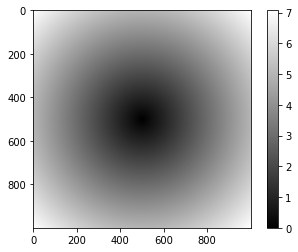

In [213]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()

In [226]:
# where

arr_1 = np.array([1,2,3,4,5])
arr_2 = np.array([-1,-2,-3,-4,-5])
cond_arr = np.array([bool(x % 2) for x in range(1,6)])

#we could do (very slow since all of it is in python)
selection = [x if z else y for x,y,z in zip(arr_1,arr_2,cond_arr)]
print(selection)

# instead do this
selection_np = np.where(cond_arr, arr_1, arr_2)
print(selection_np)


# where arguments can also be scalar
select_odd = np.where(arr_1 % 2 == 0, 0, arr_1)
print(select_odd)

[1, -2, 3, -4, 5]
[ 1 -2  3 -4  5]
[1 0 3 0 5]


In [239]:
# aggregations and reductions
arr = np.random.randn(3,3)
print(arr)

print(np.mean(arr))
print(np.sum(arr))

print(np.mean(arr, axis=0))

print("=======")
arr = np.arange(9, dtype=np.float64).reshape(3,3)
print(arr)

print(np.sum(arr, axis=0))
print(np.sum(arr, axis=1))

print(np.cumsum(arr, axis=1))

[[ 1.15835023 -0.70394427  1.97181942]
 [-0.80855889 -1.43698642 -0.51954994]
 [ 0.11824519  0.84990935  0.51294519]]
0.12691442944800388
1.1422298650320348
[ 0.15601218 -0.43034045  0.65507156]
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[ 9. 12. 15.]
[ 3. 12. 21.]
[[ 0.  1.  3.]
 [ 3.  7. 12.]
 [ 6. 13. 21.]]


In [255]:
# boolean array

arr = np.random.randn(100)
print((arr>0).sum()) # boolean values are coerced into 0 and 1 so can be summed

print((arr>0).any())
print((arr>0).all())
arr[True] = 1 # turn all elements to 1
print(arr.all())

#sorting
arr = np.array([1,4,1,2,3,1])
arr.sort()
print(arr)

#quantiles
arr = np.arange(100)
print(arr[int(0.05 * len(arr))])

53
True
False
True
[1 1 1 2 3 4]
5


In [262]:
# set-like operations
arr_1 = np.array([1,1,2,3,4,4,4,4,5])
arr_2 = np.array([6,6,1,3])

print(np.unique(arr_1))
print(np.intersect1d(arr_1, arr_2))
print(np.union1d(arr_1, arr_2))
print(np.in1d(arr_1, arr_2)) # figures out whether each element in arr_1 is in arr_2
print(np.setdiff1d(arr_1, arr_2)) # elements in a but not in b
print(np.setxor1d(arr_1, arr_2)) # elements that are in one but no both

[1 2 3 4 5]
[1 3]
[1 2 3 4 5 6]
[ True  True False  True False False False False False]
[2 4 5]
[2 4 5 6]


In [268]:
!pwd
!ls -lrt

/home/rushi/dev/git/python
total 320
-rw-r--r-- 1 rushi rushi  89926 May  7 10:51 effective_python.ipynb
drwxr-xr-x 3 rushi rushi   4096 May 15 08:13 c_module
-rw-r--r-- 1 rushi rushi  97846 May 15 08:22 python_cookbook.ipynb
drwxr-xr-x 7 rushi rushi   4096 May 18 20:11 environment
-rw-r--r-- 1 rushi rushi 127698 May 19 20:28 PythonForDataAnalysis.ipynb
rm: cannot remove 'some_array.npy': No such file or directory


In [270]:
# file saving and loading
arr = np.arange(10)
np.save('../../data/some_array', arr)

In [271]:
!ls -lrt ../../data/


total 8
drwxr-xr-x 10 rushi rushi 4096 Jun  8  2017 pda
-rw-r--r--  1 rushi rushi  208 May 19 20:29 some_array.npy


In [276]:
arr = np.load('../../data/some_array.npy')
print(arr)

[0 1 2 3 4 5 6 7 8 9]


In [278]:
# saving multiple arrays
a_arr = np.arange(10)
b_arr = np.arange(5)
np.savez('../../data/mult_arrays.npz', a=a_arr, b=b_arr)
# can also use np.savez_compressed('arrays_compressed.npz')
values = np.load('../../data/mult_arrays.npz')
print(type(values))
print(values['a'])
print(values['b'])

<class 'numpy.lib.npyio.NpzFile'>
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]


In [281]:
#linear algebra
x = np.array([[1,2,3],[4,5,6]]) # 2x3 matrix
y = np.array([[1],[2], [4]]) # 3x1 matrix
print(np.dot(x,y))

# infix operator also does dot mult
print(x@y)

[[17]
 [38]]
[[17]
 [38]]


In [286]:
# basic linear algebra functions
arr = np.random.randn(3,3)
mat = arr.T.dot(arr)
print(mat)
print(np.linalg.inv(mat))
print(mat@np.linalg.inv(mat))

# TODO understand and do:
# eigens, pinv(penrose-moore pseudo inverse), qr decomposition,
# svd (singular value decomposition), solve Ax = b for x
# lstsq (least squares solution for ) Ax = b

[[ 1.44937947  0.08307145 -0.66755479]
 [ 0.08307145  0.34493396 -0.65476578]
 [-0.66755479 -0.65476578  2.39115406]]
[[0.83127264 0.50046822 0.36911444]
 [0.50046822 6.33847741 1.87537397]
 [0.36911444 1.87537397 1.03478687]]
[[ 1.00000000e+00  7.72923104e-17 -5.84209203e-17]
 [-1.48721238e-18  1.00000000e+00 -2.82469012e-17]
 [ 2.46343443e-17  3.61891644e-16  1.00000000e+00]]


In [289]:
# pseudo random number generation

samples = np.random.normal(size=(4,4))
print(samples)

[[-0.51957403 -1.63289077  1.3640908  -0.68774719]
 [-2.35507342 -1.64901052  1.29616814 -0.04114126]
 [ 0.58024239  1.12228698  0.103795   -0.14703223]
 [ 0.21214896 -0.59112371  0.26030598  0.1141144 ]]


In [292]:
from random import normalvariate

# generating large number of samples is faster in numpy
# since it generates them simultaneously ?
N = 1000000
%timeit samples = [normalvariate(0,1) for _ in range(N)]

490 ms ± 2.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [293]:
%timeit np.random.normal(size=N)

22.5 ms ± 948 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [298]:
# get the same random sequence
np.random.seed(1234)
print(np.random.rand(10))
np.random.seed(1234)
print(np.random.rand(10))

# instead of global state, use a generator instead
rng = np.random.RandomState(1234)
print(rng.randn(10))
rng = np.random.RandomState(1234)
print(rng.randn(10))

# TODO: Learn and run:
# binomial, beta, chisquare, gamme and uniform distributions


[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581 0.27259261
 0.27646426 0.80187218 0.95813935 0.87593263]
[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581 0.27259261
 0.27646426 0.80187218 0.95813935 0.87593263]
[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873  0.88716294
  0.85958841 -0.6365235   0.01569637 -2.24268495]
[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873  0.88716294
  0.85958841 -0.6365235   0.01569637 -2.24268495]


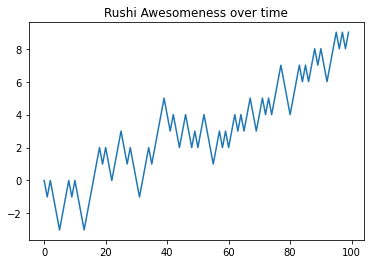

In [304]:
# random walk and simulation

import random
position = 0 
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

plt.title("Rushi Awesomeness over time")
plt.plot(walk[:100])

-11
34
183
[[  1   2   3 ... -26 -27 -26]
 [ -1  -2  -1 ... -34 -35 -34]
 [  1   2   1 ... -24 -23 -22]
 ...
 [ -1  -2  -1 ...  -2  -3  -2]
 [ -1  -2  -1 ...  12  11  12]
 [ -1   0  -1 ...   6   5   6]]
-107
105
3324


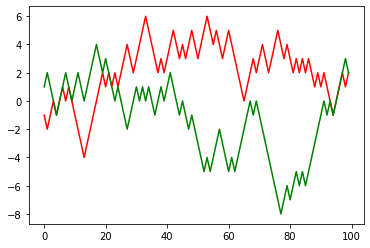

In [327]:
# can achieve the same effect as above 
# since a walk is just a collection of steps and a cumulative sum

nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
print(walk.min())
print(walk.max())

# first time a value crossed a threshold
print((np.abs(walk) >= 10).argmax())

#generating multiple random walk simulations
nwalks = 5000
draws = np.random.randint(0, 2, size=(nwalks,nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1) # cumsum over the 1st axis (not the 0th)
print(walks)

print(walks.min())
print(walks.max())


hits30 = (np.abs(walks) >= 30).any(1) # creats a boolean array
print(hits30.sum()) # number of walks that hit 30

# crossing times
(np.abs(walks[hits30]) >= 30).argmax(1)

# draw simultaneous
t = walks[1][:100]
z = walks[2][:100]
#print(t)
#print(z)
plt.plot(t,'r', z, 'g')

###  Chapter 5 - Pandas

In [353]:
# series (fixed value ordered dict with index(keys) and values (np array))

import pandas as pd
from pandas import Series, DataFrame

obj = Series([1,2,3,4]) # similar to np.array
print(obj)

# series have a sequence of values and an associated array of labels
# called its index

print(obj.values)
print(type(obj.values)) # is a numpy array !
print(type(obj.index))
print(obj.index)
#help(obj) --> TODO: Read the entire help


obj2 = pd.Series([1,2,3,4], index = ['a','b', 'c', 'd'])
print(obj2)
print(type(obj2.index))

# can use labels for access
print(obj2['c'])
print(obj2[2])

print("====")
# link preserved post numpy filtering
print(obj2[obj2 > 2])

# can also be passed to numpy universal functions
print(np.abs(obj2))


0    1
1    2
2    3
3    4
dtype: int64
[1 2 3 4]
<class 'numpy.ndarray'>
<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=0, stop=4, step=1)
a    1
b    2
c    3
d    4
dtype: int64
<class 'pandas.core.indexes.base.Index'>
3
3
====
c    3
d    4
dtype: int64
a    1
b    2
c    3
d    4
dtype: int64


In [356]:
# Series can also be though of as a fixed length ordered dict
# mapping from index key to values

# dict like operations
print('b' in obj2)
print('e' in obj2)


# dict to series conversion
sdata = {'a' : 1, 'b' : 2, 'c' : 3, 'd': 4}
pdata = Series(sdata)
print(pdata)

# pass in a different order 
ordered_keys = ['a', 'b', 'd', 'e'] # exclude c, include e
pdata = Series(sdata, index=ordered_keys)
print(pdata) # will include e with a null value and exclude c
print(pdata.isnull())

True
False
a    1
b    2
c    3
d    4
dtype: int64
a    1.0
b    2.0
d    4.0
e    NaN
dtype: float64
a    False
b    False
d    False
e     True
dtype: bool


In [362]:
# data alignment by keys
sdata = {'a' : 1, 'b' : 2, 'c' : 3, 'd': 4}
pdata = Series(sdata)

sdata = {'a' : 1, 'b' : 2, 'c' : 3, 'e': 4}
pdata_2 = Series(sdata)

print(pdata + pdata_2)

#names to index and series 
pdata.name = "my_dataset"
pdata.index.name = "my_index"
print(pdata)

# indexes can be replaced in-place
pdata.index = range(4)
print(pdata)

a    2.0
b    4.0
c    6.0
d    NaN
e    NaN
dtype: float64
my_index
a    1
b    2
c    3
d    4
Name: my_dataset, dtype: int64
0    1
1    2
2    3
3    4
Name: my_dataset, dtype: int64


In [378]:
# dataframe
# table of data contains an ordered collection of columns.
# has a row and column index
# dict of series all sharing the same index

# assumption: the shared index is the row index and the 
# column index is the keys in the dict which has columns/Series as values ?

# construction from dict of equal length lists
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada']
        ,'year': [2000, 2001, 2002, 2001, 2002, 2003]
        ,'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = DataFrame(data)
print(frame)

# can provide order of the columns as well as row indexes
frame2 = DataFrame(data, 
                   columns=['year', 'state', 'pop', 'empty'],
                   index=['one', 'two', 'three', 'four', 'five', 'six'])
print()
print(frame2)

print(frame2.columns)
print(type(frame2.columns))

print()
# access as dict key or attribute
print(frame2.year)# returns a series with the same index as the frame 
print(frame2['state']) 
print(frame2.year.name)
print(frame2.year.index)
print(frame2.year.values)

print("---")
# getting an entire row (with all columns from the frame)
print(frame2.loc['one']) 
# the return type is a series with the column names
# as the index of the series
print(type(frame2.loc['one']))
print(frame2.loc['one'].index)

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2

       year   state  pop empty
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7   NaN
three  2002    Ohio  3.6   NaN
four   2001  Nevada  2.4   NaN
five   2002  Nevada  2.9   NaN
six    2003  Nevada  3.2   NaN
Index(['year', 'state', 'pop', 'empty'], dtype='object')
<class 'pandas.core.indexes.base.Index'>

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64
one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object
year
Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')
[2000 2001 2002 2001 2002 2003]
---
year     2000
state    Ohio
pop       1.5
empty     NaN
Name: one, dtype: object
<class 'pandas.core.series.Series'>
Index(['year', 'state', 'pop', 'empty'], dtype='object')


In [384]:
# entire columns can be modified
print(len(frame2['empty']))
frame2['empty']  = np.arange(len(frame2['empty']))
print(frame2)

# can also do scalar assignments similar to np arrays
frame2['empty'] = 15
print(frame2)

6
       year   state  pop  empty
one    2000    Ohio  1.5      0
two    2001    Ohio  1.7      1
three  2002    Ohio  3.6      2
four   2001  Nevada  2.4      3
five   2002  Nevada  2.9      4
six    2003  Nevada  3.2      5
       year   state  pop  empty
one    2000    Ohio  1.5     15
two    2001    Ohio  1.7     15
three  2002    Ohio  3.6     15
four   2001  Nevada  2.4     15
five   2002  Nevada  2.9     15
six    2003  Nevada  3.2     15


In [387]:
# assign new columns
frame2['new_column'] = np.arange(6)
print(frame2)

       year   state  pop  empty  new_column
one    2000    Ohio  1.5     15           0
two    2001    Ohio  1.7     15           1
three  2002    Ohio  3.6     15           2
four   2001  Nevada  2.4     15           3
five   2002  Nevada  2.9     15           4
six    2003  Nevada  3.2     15           5


In [400]:
# assign new series

# this will not work since the series does not have the 
# right indexes
new_column_2 = pd.Series([x for x in range(6)])
frame2['new_column_2'] = new_column_2
print(frame2)

#assigning the indexes to the series will make it work
print("==========")
new_column_2 = pd.Series([x for x in range(6)],
                         index=frame2.index)
frame2['new_column_2'] = new_column_2
print(frame2)

# deleting columns
del frame2['new_column_2']
print(frame2.columns)

       year   state  pop  new_column_2
one    2000    Ohio  1.5           NaN
two    2001    Ohio  1.7           NaN
three  2002    Ohio  3.6           NaN
four   2001  Nevada  2.4           NaN
five   2002  Nevada  2.9           NaN
six    2003  Nevada  3.2           NaN
       year   state  pop  new_column_2
one    2000    Ohio  1.5             0
two    2001    Ohio  1.7             1
three  2002    Ohio  3.6             2
four   2001  Nevada  2.4             3
five   2002  Nevada  2.9             4
six    2003  Nevada  3.2             5
Index(['year', 'state', 'pop'], dtype='object')


In [411]:
# nested dictionaries for pandas dataframe construction

pop = {'nevada' : {2001: 2.4, 2002: 2.9},
       'ohio' : {2000: 1.5, 2001:1.6, 2002:3.5}}
pop_frame = DataFrame(pop)
print(pop_frame)
# the inner keys are considered to be the row indexes
# the outer keys are considered to be the column indexes
print(pop_frame.columns)
print(pop_frame.index)
# getting a particular row 
print(pop_frame.loc[2002])

# dataframe can be transposed
print(pop_frame.T)

# values will return a 2 dimensional array with all of the values
print(pop_frame.values)
print(pop_frame.values.shape)
print(pop_frame.T.values.shape)

      nevada  ohio
2001     2.4   1.6
2002     2.9   3.5
2000     NaN   1.5
Index(['nevada', 'ohio'], dtype='object')
Int64Index([2001, 2002, 2000], dtype='int64')
nevada    2.9
ohio      3.5
Name: 2002, dtype: float64
        2001  2002  2000
nevada   2.4   2.9   NaN
ohio     1.6   3.5   1.5
[[2.4 1.6]
 [2.9 3.5]
 [nan 1.5]]
(3, 2)
(2, 3)


In [435]:
# construction methods for data frame

# np 2d array
np_2d = np.arange(10).reshape(2,5)
print(np_2d)

pd = DataFrame(np_2d,
               columns=['one', 'two', 'three', 'four', 'five'],
               index=['row_one', 'row_two']
              )
print(pd)
print("=====")

# dict of arrays, lists or tuples
# keys of dict are interpreted as column names
my_dict = {'col_a' : [1,2,3,4,5],
          'col_b' : [x for x in range(5)],
          'col_c' : ['a', 'b', 'c', 'd', 'e']}
pd = DataFrame(my_dict)
print(pd)

# dict of series
series_1 = Series([1,2,3,4,5], index=['a','b','c','d','e'])
series_2 = Series([2,2,2,2,2], index=['a','b','c','d','e'])
pd = DataFrame({'column_1' : series_1, 'column_2' : series_2})
print("===")
print(pd)

# dict of dict (inner key is a row label)
pop = {'nevada' : {2001: 2.4, 2002: 2.9},
       'ohio' : {2000: 1.5, 2001:1.6, 2002:3.5}}
pop_frame = DataFrame(pop)
print(pop_frame)

# list of series, union of indexes in series is the column index
pd = DataFrame([series_1, series_2])
print(pd)
print(pd.T)

# list of dicts
dict_1 = {'a' : 1, 'b': 2}
dict_2 = {'c' : 1, 'b': 2}
pd = DataFrame([dict_1, dict_2])
print(pd)

# list of lists or tuples (same as 2dim nd array)
list_1 = [0,1,2]
list_2 = [1,2,3]
pd = DataFrame([list_1, list_2])
# same as [[],[]] which is the same way a 2dim array looks
print("=========")
print(pd)

#  Different dataframe
# earlier dataframe had two rows.
my_pd = DataFrame(pd, index=['row_1', 'row_2'])
print(my_pd) 

my_pd_2 = DataFrame(pd)
print(my_pd_2)

# TODO: numpy maskled array and numpy structured record/record array

[[0 1 2 3 4]
 [5 6 7 8 9]]
         one  two  three  four  five
row_one    0    1      2     3     4
row_two    5    6      7     8     9
=====
   col_a  col_b col_c
0      1      0     a
1      2      1     b
2      3      2     c
3      4      3     d
4      5      4     e
===
   column_1  column_2
a         1         2
b         2         2
c         3         2
d         4         2
e         5         2
      nevada  ohio
2001     2.4   1.6
2002     2.9   3.5
2000     NaN   1.5
   a  b  c  d  e
0  1  2  3  4  5
1  2  2  2  2  2
   0  1
a  1  2
b  2  2
c  3  2
d  4  2
e  5  2
     a  b    c
0  1.0  2  NaN
1  NaN  2  1.0
   0  1  2
0  0  1  2
1  1  2  3
        0   1   2
row_1 NaN NaN NaN
row_2 NaN NaN NaN
   0  1  2
0  0  1  2
1  1  2  3


In [447]:
# index objects
import pandas as pd

pd_d = DataFrame(range(3), index=['a', 'b', 'c'])
print(pd_d.index)
print(type(pd_d.index))
print(pd_d.index[1:])

# create new lables
labels = pd.Index(np.arange(3))
print(labels)

new_series = pd.Series([0,1,2], index=labels)
print(new_series.index is labels)



Index(['a', 'b', 'c'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
Index(['b', 'c'], dtype='object')
Int64Index([0, 1, 2], dtype='int64')
True


In [459]:
dict_1 = {'a' : 1, 'b': 2}
dict_2 = {'a' : 3, 'b': 4}
pd_d = DataFrame([dict_1, dict_2])
print(pd_d)

print(pd_d.columns)

# set like semantics
print('a' in pd_d.columns)

import pandas as pd 
# pandas index can contain duplicate labels
labels = pd.Index(['a','d','d'])
print(labels)

pd_d = DataFrame(np.arange(3), labels)
print(pd_d)

print(type(pd_d.T['d'])) # if there are multiple selections, returns a dataframe
print(type(pd_d.T['a'])) # if there is a single selection, returns a series

   a  b
0  1  2
1  3  4
Index(['a', 'b'], dtype='object')
True
Index(['a', 'd', 'd'], dtype='object')
   0
a  0
d  1
d  2
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [463]:
# essential functionality

obj = pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'])
print(obj)
obj2 = obj.reindex(['c', 'd', 'b', 'a', 'e']) # re-arrange + introduce new
print(obj2)

a    1
b    2
c    3
d    4
dtype: int64
c    3.0
d    4.0
b    2.0
a    1.0
e    NaN
dtype: float64


In [470]:
obj = pd.Series(['Apple', 'Orange', 'Banana'], index=[0,5,7])
print(obj)
obj2 = obj.reindex(range(8), method='ffill')
print(obj2)

obj3 = obj.reindex(range(8), method='bfill')
print(obj3)

obj4 = obj.reindex(range(8), method='nearest')
print(obj4)

0     Apple
5    Orange
7    Banana
dtype: object
0     Apple
1     Apple
2     Apple
3     Apple
4     Apple
5    Orange
6    Orange
7    Banana
dtype: object
0     Apple
1    Orange
2    Orange
3    Orange
4    Orange
5    Orange
6    Banana
7    Banana
dtype: object
0     Apple
1     Apple
2     Apple
3    Orange
4    Orange
5    Orange
6    Banana
7    Banana
dtype: object


In [475]:
obj = pd.DataFrame({'a': [0,3] , 'b': [2,3]})
print(obj)

obj2 = obj.reindex(columns=['a', 'e','f'], method='ffill')
print(obj2)

   a  b
0  0  2
1  3  3
   a  e  f
0  0  2  2
1  3  3  3


In [482]:
# dropping indexes
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

print(data)
data2 = data.drop(['Ohio', 'Utah']) # drops axis 0
print(data2)
data3 = data2.drop(['two', 'three'], axis=1) # drops axis 1
print(data3)

data.drop(['Ohio'], inplace=True)
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
          one  two  three  four
Colorado    4    5      6     7
New York   12   13     14    15
          one  four
Colorado    4     7
New York   12    15
          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [487]:
# indexing, selection and filtering

obj = pd.Series(np.arange(4.), index = ['a','b','c','d'])
print(obj['a'] == obj[0])

print(obj[2:4] == obj[['c', 'd']])
print(obj[obj<2])

True
c    True
d    True
dtype: bool
a    0.0
b    1.0
dtype: float64


In [500]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

# for dataframes, only columns are directly accesible
#print(data[['Ohio']]) --> Error
print(data)
print(data['one'])
print(data['one'] % 8 == 0) # creates a one dim selection array
print(data[data['one'] % 8 == 0])

#special case to select rows
print(data[:2])

# passing in non labels does not work
# though this  works for the series, it does not work for datframe
#rint(data[2])

data[data['one'] % 8 == 0] = 19
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int64
Ohio         True
Colorado    False
Utah         True
New York    False
Name: one, dtype: bool
      one  two  three  four
Ohio    0    1      2     3
Utah    8    9     10    11
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
          one  two  three  four
Ohio       19   19     19    19
Colorado    4    5      6     7
Utah       19   19     19    19
New York   12   13     14    15


In [514]:
# loc and iloc 
# dataframe label-indexing on the rows
# loc uses the axes labels
# iloc uses the integers directly
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

#selecting a single row returns a series
# which has the column indexes as it's row index
data_ohio = data.loc['Ohio', ['two', 'three']]
print(data_ohio)
print(type(data_ohio))

data_sel = data.iloc[0, [0,1,2]]
print(data_sel)
print(type(data_sel))

#select all columns
data_sel = data.iloc[0]
print(data_sel)

#selecting multiple rows and columns
# this results in a dataframe
data_sel = data.loc[['Ohio', 'Colorado'], ['one', 'two']]
print(data_sel)
print(type(data_sel))

# can use a list for rows, columns
# can also use slices ':' notation
# can use single labels
# can mix and match

data_sel = data.loc['Ohio', 'two']
print(data_sel)

data_sel = data.loc['Ohio', 'two':]
print(data_sel)

print(data.iloc[:,3:][data['four'] > 6])

two      1
three    2
Name: Ohio, dtype: int64
<class 'pandas.core.series.Series'>
one      0
two      1
three    2
Name: Ohio, dtype: int64
<class 'pandas.core.series.Series'>
one      0
two      1
three    2
four     3
Name: Ohio, dtype: int64
          one  two
Ohio        0    1
Colorado    4    5
<class 'pandas.core.frame.DataFrame'>
1
two      1
three    2
four     3
Name: Ohio, dtype: int64
          four
Colorado     7
Utah        11
New York    15


In [520]:
# integer indexing

ser = pd.Series(np.arange(3))
print(ser)

# the below does not work since there is no index with -1
# this is different from python's list indexing since -1
# returns the last element
#print(ser[-1]) 

# this is because when the index is formed out of integers
# indexing using -1 can be both label based and integer based
# which can be confusing

# if the axis has any integers, the indexing is going to be label based

ser = pd.Series(np.arange(3), index=['a', 'b', 'c'])
print(ser[-1]) # works


ser = pd.Series(np.arange(3), index=['a', 'b', 5])
#print(ser[-1]) # does not work


0    0
1    1
2    2
dtype: int64
2


In [531]:
# arithmetic and data alignment

#nan propagation

s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])

print(s1)
print(s2)

# for indexes that don't exist in both; it's 
# as though we are adding NaN to a value which is the same as Nan
print(s1 + s2)


# it's the same for dataframes
# adding columns + indexes that don't exist in both dataframes
# will result in NaN values

df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('abc'),
                   index=['Ohio', 'Texas', 'Colorado'])

df2 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'NY', 'Colorado'])

print(df1 + df2)

# to do the above, a fill value maybe useful

print(df1.add(df2, fill_value=0))
print(df1.radd(df2, fill_value=0))
#help(df1.radd)

# radd, rsub, etc
# when doing something like a + b 
# what's invoked is actually a.__add__(b)
# however, this is not useful when adding with a scalar
# example: obj + 4 results in obj.__add__(4).
# however, 4+ obj results in 4.__add__(obj) which is not implemented
# when this happens, python invokes obj.__radd__(4) as a fallback

# for dataframes this is useful since operations with scalars are common


a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64
a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64
           a     b     c   d
Colorado NaN  13.0  15.0 NaN
NY       NaN   NaN   NaN NaN
Ohio     NaN   1.0   3.0 NaN
Texas    NaN   NaN   NaN NaN
            a     b     c    d
Colorado  6.0  13.0  15.0  8.0
NY        NaN   3.0   4.0  5.0
Ohio      0.0   1.0   3.0  2.0
Texas     3.0   4.0   5.0  NaN
            a     b     c    d
Colorado  6.0  13.0  15.0  8.0
NY        NaN   3.0   4.0  5.0
Ohio      0.0   1.0   3.0  2.0
Texas     3.0   4.0   5.0  NaN


In [544]:
# operations between data frames and series 

# is similar to opeartions between numpy arrays of different 
# dimensions where the operation gets broadcasted to lower dimensions


df2 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'NY', 'Colorado'])

print(df2)
sub_series = pd.Series(np.arange(3), index=list('bcd'))
print(sub_series)

# series is one dimensional, df is two, 
# this operation is therefore applied to all of the rows of df (lower dimensions)
print(df2 - sub_series)

# can also broadcast over columns matching on rows
sub_series = pd.Series([5], index=['Ohio'])
print(df2.sub(sub_series, axis='index'))

# subtract a columns values from all other columns
print(df2.sub(df2['d'], axis='index'))

            b    c    d
Ohio      0.0  1.0  2.0
NY        3.0  4.0  5.0
Colorado  6.0  7.0  8.0
b    0
c    1
d    2
dtype: int64
            b    c    d
Ohio      0.0  0.0  0.0
NY        3.0  3.0  3.0
Colorado  6.0  6.0  6.0
            b    c    d
Colorado  NaN  NaN  NaN
NY        NaN  NaN  NaN
Ohio     -5.0 -4.0 -3.0
            b    c    d
Ohio     -2.0 -1.0  0.0
NY       -2.0 -1.0  0.0
Colorado -2.0 -1.0  0.0


In [552]:
#  function application and mapping
df2 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'NY', 'Colorado'])

print(df2)
print(np.sqrt(df2))

f = lambda x : x.max() - x.min()

# applies across rows by default 

print(df2.apply(f))
print(df2.apply(f, axis=0))

print(df2.apply(f, axis='columns'))
print(df2.apply(f, axis=1))

# applymap allows application of a function to each value

f = lambda x : x + 2
print(df2.applymap(f))

            b    c    d
Ohio      0.0  1.0  2.0
NY        3.0  4.0  5.0
Colorado  6.0  7.0  8.0
                 b         c         d
Ohio      0.000000  1.000000  1.414214
NY        1.732051  2.000000  2.236068
Colorado  2.449490  2.645751  2.828427
b    6.0
c    6.0
d    6.0
dtype: float64
b    6.0
c    6.0
d    6.0
dtype: float64
Ohio        2.0
NY          2.0
Colorado    2.0
dtype: float64
Ohio        2.0
NY          2.0
Colorado    2.0
dtype: float64
            b    c     d
Ohio      2.0  3.0   4.0
NY        5.0  6.0   7.0
Colorado  8.0  9.0  10.0


In [561]:
# sorting and ranking
obj = pd.Series(range(4), list('acdb'))
print(obj.index)
print(obj.sort_index())
print(obj.sort_values())

# use data in multiple columns

frame = pd.DataFrame({'b': [4, 7, -3, 7], 'a': [0, 1, 0, 3]})
print(frame)

print(frame.sort_values(by='b'))
print(frame.sort_values(by=['b', 'a']))

Index(['a', 'c', 'd', 'b'], dtype='object')
a    0
b    3
c    1
d    2
dtype: int64
a    0
c    1
d    2
b    3
dtype: int64
   b  a
0  4  0
1  7  1
2 -3  0
3  7  3
   b  a
2 -3  0
0  4  0
1  7  1
3  7  3
   b  a
2 -3  0
0  4  0
1  7  1
3  7  3


In [ ]:
#ranking